In [40]:
## 1.) Introduction
#This project is important because the current job maarket is the worst that its ever been. The aim of this project is to, firstly, decpiher the current trends, and then see if we can uncover why it is the way it is. 

In [41]:
#Data Handling
import pandas as pd
import numpy as np

#visualization (Plotly allows for interactive chart functionality)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

#Cleaner Warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("✅ All libraries are working!")


✅ All libraries are working!


In [43]:
# Establish file path
filePath = "data/series-160925.csv"

# Load file to data frame and display first 12 rows
raw = pd.read_csv(filePath, dtype=str)
raw.head(12)


,Title,"Unemployment rate (aged 16 and over, seasonally adjusted): %"
0,CDID,MGSX
1,Source dataset ID,LMS
2,PreUnit,NaN
3,Unit,%
4,Release date,16-09-2025
5,Next release,14 October 2025
6,Important notes,NaN
7,1971,4.1
8,1972,4.3
9,1973,3.7


In [44]:
#Clean The Data
#The first 7 rows are metadata (data we don't need) so we will get rid of them and display the rows after
data = raw.iloc[7:]

#show the first ten rows of the cleaned up data
#print("The shape of the clean data is:", data.shape)
#print("The shape of the raw data is:", raw.shape)


#Rename to friendly more readable and concise name
column_value = data.columns[1]
#print(column_value)
data = data.rename(columns={"Title": "Period", column_value: "Unemployment Rate (%)"})
data.head()



,Period,Unemployment Rate (%)
7,1971,4.1
8,1972,4.3
9,1973,3.7
10,1974,3.7
11,1975,4.5


In [45]:
#print('This is loc:\n', data.loc[[7,9,11], 'Period'], "\n \n This is iloc:\n", data.iloc[0:3, 1])

In [46]:
# Remove spaces and symbols, keep only digits, dot, minus
data["Unemployment Rate (%)"] = (
    data["Unemployment Rate (%)"]
    .astype(str)
    .str.strip()
    .str.replace(r"[^\d\.\-]", "", regex = True)
)

# Convert to float
data["Unemployment Rate (%)"] = pd.to_numeric(data["Unemployment Rate (%)"], errors="coerce")

# Check result
data.head()

,Period,Unemployment Rate (%)
7,1971,4.1
8,1972,4.3
9,1973,3.7
10,1974,3.7
11,1975,4.5


In [47]:
annual_mask= data["Period"].str.fullmatch(r"\d{4}")

quarterly_mask= data['Period'].str.fullmatch(r"\d{4}\sQ[1-4]")

monthly_mask = data["Period"].str.fullmatch(r"\d{4}\s(?:JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC)")

annual    = data.loc[annual_mask,    ["Period", "Unemployment Rate (%)"]].copy()
quarterly = data.loc[quarterly_mask, ["Period", "Unemployment Rate (%)"]].copy()
monthly   = data.loc[monthly_mask,   ["Period", "Unemployment Rate (%)"]].copy()

In [48]:
# Function to parse YYYY MON into a real date
def parse_month(period: str):
    year, mon = period.split()   # split into "2020" and "JUL"
    mon = mon.title()            # make "JUL" → "Jul" (pandas-friendly)
    return pd.to_datetime(f"{year}-{mon}-01", format="%Y-%b-%d", errors="coerce")

# Apply to monthly dataset
monthly["Date"] = monthly["Period"].apply(parse_month)

# Sort chronologically
monthly = monthly.sort_values("Date").reset_index(drop=True)

monthly.head()


,Period,Unemployment Rate (%),Date
0,1971 FEB,3.8,1971-02-01
1,1971 MAR,3.9,1971-03-01
2,1971 APR,4.0,1971-04-01
3,1971 MAY,4.1,1971-05-01
4,1971 JUN,4.1,1971-06-01


In [49]:
# Function to parse YYYY Q#
def parse_quarter(period: str):
    year, q = period.split()
    quarter_map = {"Q1": "03-31", "Q2": "06-30", "Q3": "09-30", "Q4": "12-31"}
    return pd.to_datetime(f"{year}-{quarter_map[q]}", format="%Y-%m-%d", errors="coerce")

# Apply to quarterly dataset
quarterly["Date"] = quarterly["Period"].apply(parse_quarter)
quarterly = quarterly.sort_values("Date").reset_index(drop=True)

quarterly.head()


,Period,Unemployment Rate (%),Date
0,1971 Q1,3.8,1971-03-31
1,1971 Q2,4.1,1971-06-30
2,1971 Q3,4.2,1971-09-30
3,1971 Q4,4.4,1971-12-31
4,1972 Q1,4.5,1972-03-31


In [50]:
annual["Date"] = pd.to_datetime(annual["Period"] + "-12-31", format="%Y-%m-%d", errors="coerce")
annual = annual.sort_values("Date").reset_index(drop=True)

annual.head()


,Period,Unemployment Rate (%),Date
0,1971,4.1,1971-12-31
1,1972,4.3,1972-12-31
2,1973,3.7,1973-12-31
3,1974,3.7,1974-12-31
4,1975,4.5,1975-12-31


In [51]:
print("Annual:", annual.shape)
print("Quarterly:", quarterly.shape)
print("Monthly:", monthly.shape)


Annual: (54, 3)
Quarterly: (218, 3)
Monthly: (653, 3)


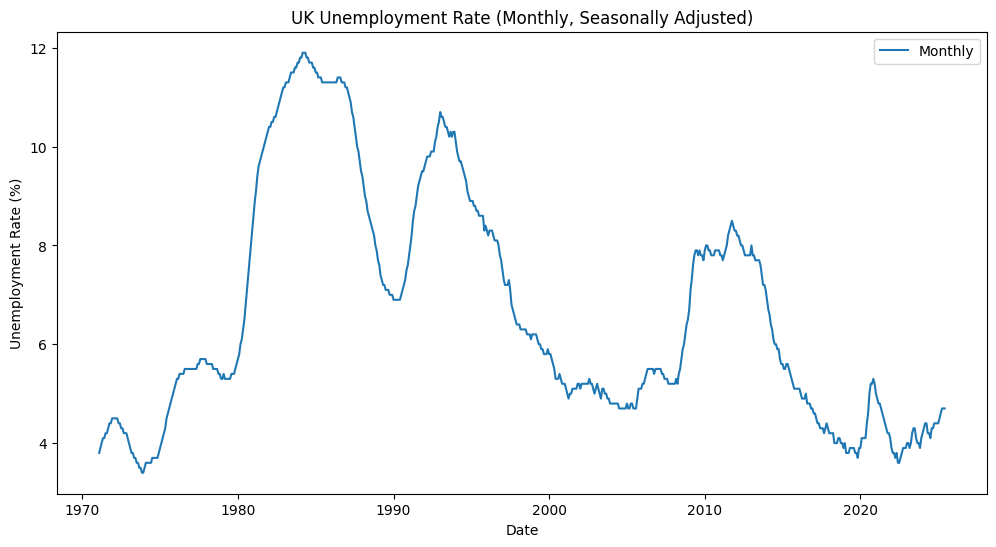

In [52]:
plt.figure(figsize=(12,6))
plt.plot(monthly["Date"], monthly["Unemployment Rate (%)"], label="Monthly")
plt.title("UK Unemployment Rate (Monthly, Seasonally Adjusted)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


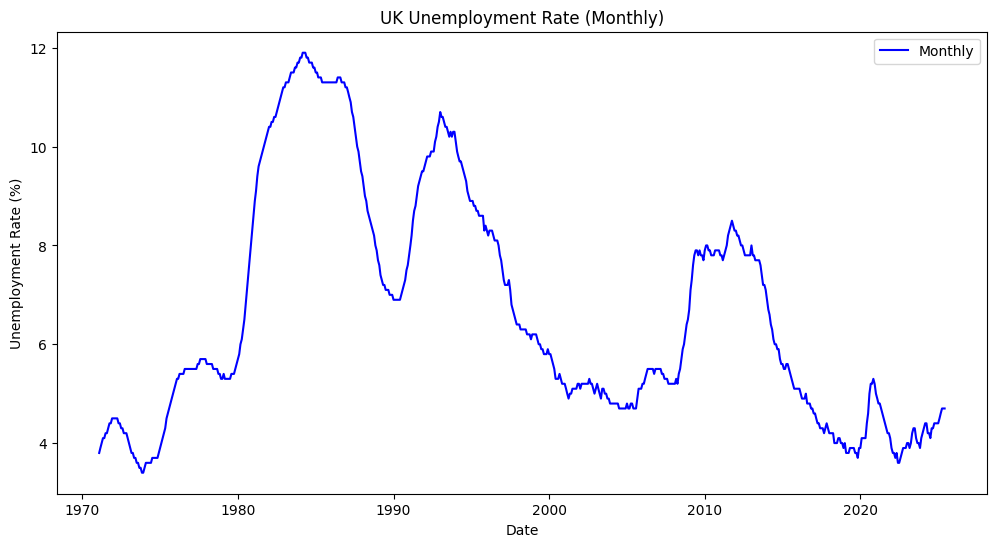

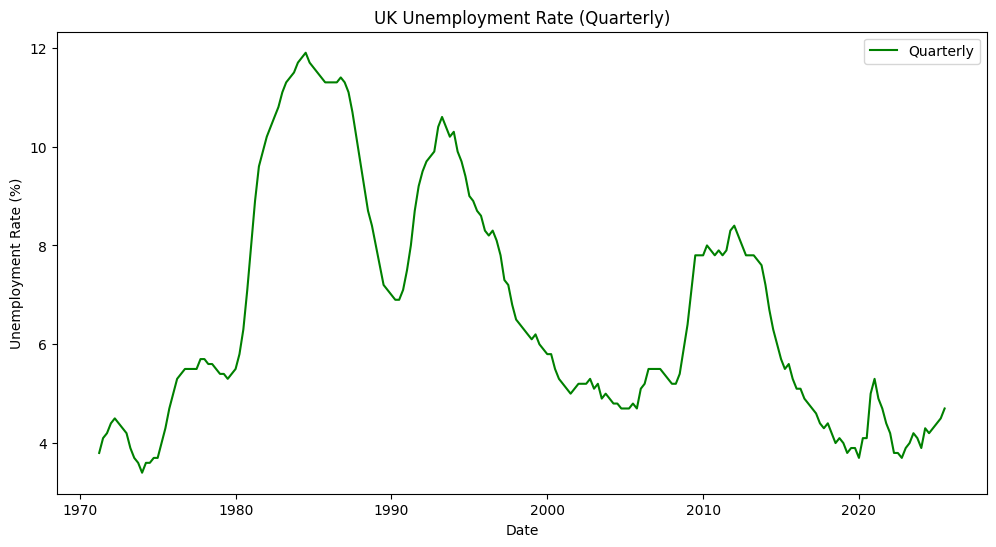

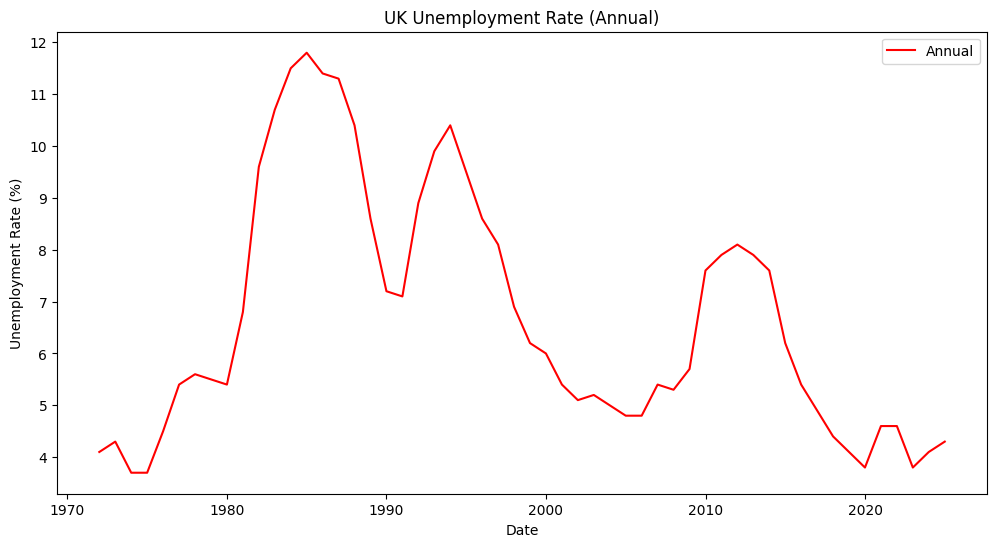

In [53]:
# Monthly trend
plt.figure(figsize=(12,6))
plt.plot(monthly["Date"], monthly["Unemployment Rate (%)"], label="Monthly", color="blue")
plt.title("UK Unemployment Rate (Monthly)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

# Quarterly trend
plt.figure(figsize=(12,6))
plt.plot(quarterly["Date"], quarterly["Unemployment Rate (%)"], label="Quarterly", color="green")
plt.title("UK Unemployment Rate (Quarterly)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

# Annual trend
plt.figure(figsize=(12,6))
plt.plot(annual["Date"], annual["Unemployment Rate (%)"], label="Annual", color="red")
plt.title("UK Unemployment Rate (Annual)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


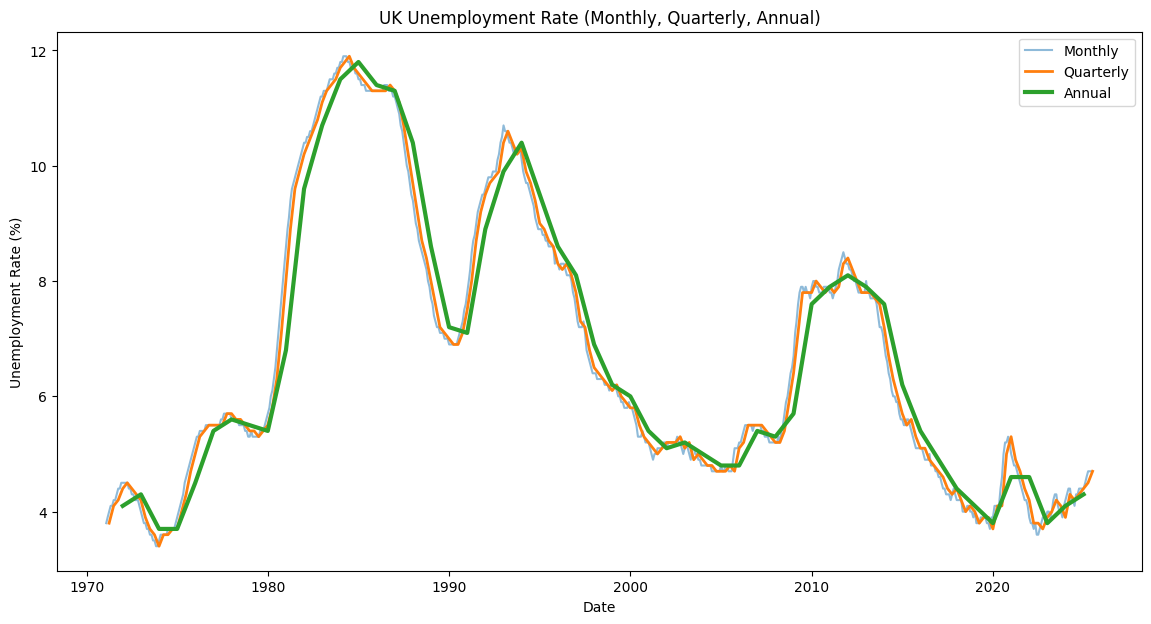

In [54]:
plt.figure(figsize=(14,7))

plt.plot(monthly["Date"], monthly["Unemployment Rate (%)"], label="Monthly", alpha=0.5)
plt.plot(quarterly["Date"], quarterly["Unemployment Rate (%)"], label="Quarterly", linewidth=2)
plt.plot(annual["Date"], annual["Unemployment Rate (%)"], label="Annual", linewidth=3)

plt.title("UK Unemployment Rate (Monthly, Quarterly, Annual)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


In [56]:
fig = px.line(
    monthly,
    x="Date",
    y="Unemployment Rate (%)",
    title="UK Monthly Unemployment Rate (Interactive)"
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed